<a href="https://colab.research.google.com/github/Thrcordeiro/DesafioPandas/blob/main/bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



initiated datasets repo at: /root/.pydataset/


Desafio 1 - Importando dataset
pelo pydataset

Definição do problema: Dado o código do dataset retorne as seguintes
informações:
1. Importe o dataset utilizando a seguinte função do pydataset:
data(“Código”)
2. Imprimir na tela o dataset;
3. Informe o tipo de dados retornado pela função data;
4. Informe o número de exemplos (linhas) e características (colunas) do
dataset.
5. Crie uma função que ao receber um DataFrame retorna o número de
linhas e colunas.

Código do dataset: plantTraits

In [ ]:
#01)

plaint_df = data('plantTraits')
print(type(plaint_df))

linhas, colunas = plaint_df.shape

def linhaColuna(dataframe):
    linhas, colunas = dataframe.shape
    return linhas, colunas

linhas, colunas = linhaColuna(plaint_df)
print(linhas)
print(colunas)


<class 'pandas.core.frame.DataFrame'>


Desafio 2: Conversão

Definição do problema: Dado o código do dataset retorne as seguintes
informações:
1. Importe o dataset utilizando a seguinte função do pydataset:
data(“Código”)
2. Imprimir na tela o dataset;
3. Informe o tipo de dados retornado pela função data;
4. Informe o número de exemplos (linhas) e características (colunas) do
dataset.
5. Crie uma função que ao receber um DataFrame retorna o número de
linhas e colunas.

Código do dataset: plantTraits

In [ ]:
#02)

women_df = data('women')

women_df = women_df.rename({'height': 'altura','weight': 'peso'}, axis = 1)

women_df['altura'] = women_df['altura'].apply(lambda x: x*2.54)
women_df['peso'] = women_df['peso'].apply(lambda x: x*0.45)

women_df.head()

,altura,peso
1,147.32,51.75
2,149.86,52.65
3,152.40,54.00
4,154.94,55.35
5,157.48,56.70


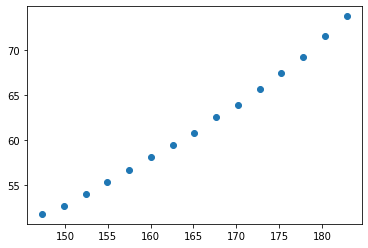

In [ ]:
plt.scatter(women_df['altura'], women_df['peso'])
plt.show()

Desafio 3: Titanic

Definição do problema:Dado que você está trabalhando com um grupo
de historiadores que estão analisando o naufrágio do Titanic, informe aos
historiadores as seguintes questões?
1. Quantas pessoas sobreviveram e quantas morreram?
2. Quantas pessoas eram da primeira, segunda e terceira classe?
3. Qual a porcentagem de sobreviventes na primeira classe?
4. Qual a porcentagem de mortos da terceira classe?

Código do dataset: titanic

In [ ]:
#03)

titanic_df = data('Titanic')

titanic_series = titanic_df.groupby(['Class','Survived'])['Freq'].sum()

sobreviventes = titanic_series[('1st', 'Yes')] + titanic_series[('2nd', 'Yes')] + titanic_series[('3rd', 'Yes')] + titanic_series[('Crew', 'Yes')]
mortos = titanic_series[('1st', 'No')] + titanic_series[('2nd', 'No')] + titanic_series[('3rd', 'No')] + titanic_series[('Crew', 'No')]

print(f"Sobreviventes: {sobreviventes} \n Mortos: {mortos}")

first = titanic_series[('1st','Yes')] + titanic_series[('1st','No')]
second = titanic_series[('2nd','Yes')] + titanic_series[('2nd','No')]
third = titanic_series[('3rd','Yes')] + titanic_series[('3rd','No')]

print(f"1a. Classe: {first} \n 2a. Classe: {second} \n 3a. clase: {third}")


sobreviventes1 = titanic_series[('1st', 'Yes')]
mortos1 = titanic_series[('1st', 'No')]

perc1 = sobreviventes1/(sobreviventes1+mortos1)
print(f"{round(perc1,2)*100}% de sobreviventes na 1a. classe")

sobreviventes3 = titanic_series[('3rd', 'Yes')]
mortos3 = titanic_series[('3rd', 'No')]

perc3 = mortos3/(mortos3+sobreviventes3)
print(f"{round(perc3,2)*100}% de mortos na 3a. classe")




Sobreviventes: 711 
 Mortos: 1490
1a. Classe: 325 
 2a. Classe: 285 
 3a. clase: 706
62.0% de sobreviventes na 1a. classe
75.0% de mortos na 3a. classe


Desafio 4: Futebol

Definição do problema: Dado que você está trabalhando numa emissora
de televisão, o narrador precisa informar o jogo com o maior número de
gols na história da Bundesliga (Campeonato Alemão). Você precisa fazer
uma busca em todos os jogos da história deste campeonato e verificar qual
jogo é esse e passar a iformação ao narrador, para posteriormente, o
narrador informar aos telespectadores.
1. Verificar os jogos com maior quantidade de gols na história da
Bundesliga
2. Informar a data, os times participantes e o placar do jogo

Código do dataset: Bundesliga

In [ ]:
#04)

soccer_df = data('Bundesliga')

soccer_df['TotalGoals'] = soccer_df['HomeGoals'] + soccer_df['AwayGoals']

maximo = soccer_df['TotalGoals'].max()

df_mask = soccer_df['TotalGoals']==maximo
games_df = soccer_df[df_mask]

games_df.head()



,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,TotalGoals
81,Borussia Dortmund,1. FC Kaiserslautern,9,3,11,1963,1963-11-16 09:30:00,12
2456,Bayern Muenchen,Borussia Dortmund,11,1,16,1971,1971-11-27 09:30:00,12
4052,1. FC Koeln,Tennis Borussia Berlin,8,4,23,1976,1977-02-26 09:30:00,12
4457,Borussia Moenchengladbach,Borussia Dortmund,12,0,34,1977,1978-04-29 09:30:00,12
5788,Borussia Dortmund,Arminia Bielefeld,11,1,12,1982,1982-11-06 09:30:00,12


Desafio 5: Forbes

Definição do problema: Você está trabalhando em um jornal e o editor
quer que você responda as seguintes questões:
1. Qual a empresa mais valiosa da lista da Forbes 2000?
2. Construa uma tabela com as TOP 10 empresas mais lucrativas da
lista.
3. Qual a média de valores de empresa das cinco categorias mais
valiosas?

Código do dataset: Forbes2000

In [ ]:
#05)

forbes_df = data('Forbes2000')

maior_valor = forbes_df['marketvalue'].max()
df_mask = forbes_df['marketvalue']==maior_valor
most_df = forbes_df[df_mask]
print(most_df['name'])


top10_df = forbes_df.nlargest(10, 'profits')['name']
top5_df = forbes_df.nlargest(5, 'marketvalue')[['name','marketvalue']]

mean = top5_df['marketvalue'].mean()
print(f"Média das 5 empresas com maior valor de mercado U$ {mean} billion")



2    General Electric
Name: name, dtype: object
Média das 5 empresas com maior valor de mercado U$ 286.63 billion


Desafio 6: Rendimento Ações

Definição do problema: Você está trabalhando num banco e preciso
informar ao seu cliente em que ano foi a maior rentabilidade de dividendo
pago por ação da empresa Johnson&Jonson

1.Agregar os rendimentos de um mesmo ano
2.Calcular a valorização do rendimento de um ano para outro
3.Informar o ano de maior rentabilidade

Código do dataset: JohnsonJohnson

In [ ]:
#06)


jj_df = data('JohnsonJohnson')

jj_df['time'] = np.trunc(jj_df['time'])
anos = pd.unique(jj_df['time'])

seriesJJ = jj_df.groupby('time')['JohnsonJohnson'].sum()

lista_time = []
lista_dividend = []

for key, value in seriesJJ.items():
    lista_time.append(key)
    lista_dividend.append(value)

dicionario = {}

dicionario['time'] = lista_time
dicionario['dividend'] = lista_dividend

jj_df = pd.DataFrame(dicionario)


rendimentos = [0]
for i, infos in jj_df.iterrows():
    if i>0:
        valor1 = jj_df.loc[i-1,'dividend']
        valor2 = jj_df.loc[i,'dividend']
        rend = ((valor2-valor1)/valor1)*100
        rendimentos.append(round(rend,4))

jj_df['Aumento anual %'] = rendimentos

maior_valor = jj_df['Aumento anual %'].max()
df_mask = jj_df['Aumento anual %']==maior_valor
most_df = jj_df[df_mask]
print(f"{most_df['time'].values[0]} com um rendimento de {most_df['Aumento anual %'].values[0]} %")











1970.0 com um rendimento de 41.5094 %


Desafio 7: Condições de Moradia

Definição do problema: Dado que você recebeu dados de pessoas em
situação de rua, informe aos pesquisadores as seguintes respostas
1. Em quantas medições, em média, as pessoas da base estava em
situação de rua?
2. Qual a proporção de moradores que estiveram inscritos em Section 8
em algum momento?
3. Quantas pessoas estiveram 100% do tempo em situação de rua
4. Qual percentual das pessoas apresentaram uma melhora de condições
de moradia no final do estudo?

Código do dataset: housing


In [ ]:
#07)
housing_df = data('housing',show_doc = True)

##housing_df.head()

housing

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Frequency Table from a Copenhagen Housing Conditions Survey

### Description

The `housing` data frame has 72 rows and 5 variables.

### Usage

    housing

### Format

`Sat`

Satisfaction of householders with their present housing circumstances, (High,
Medium or Low, ordered factor).

`Infl`

Perceived degree of influence householders have on the management of the
property (High, Medium, Low).

`Type`

Type of rental accommodation, (Tower, Atrium, Apartment, Terrace).

`Cont`

Contact residents are afforded with other residents, (Low, High).

`Freq`

Frequencies: the numbers of residents in each class.

### Source

Madsen, M. (1976) Statistical analysis of multiple contingency tables. Two
examples. _Scand. J. Statist._ **3**, 97–106.

Cox, D. R. and Snell, E. J. (1984) _Applied Statistics, Principles and
Examples_. Chapman & Hall.

### References

Venables, W. N. and Ripley, B. D. (20

In [ ]:
housing_df = data('housing')
housing_df.head()

#O que significa a coluna y e sec

,id,y,time,sec
1,1,1.0,0,1
2,1,2.0,6,1
3,1,2.0,12,1
4,1,2.0,24,1
5,2,1.0,0,1


In [ ]:
suicide_df = data('Suicide')

#Explorar os dados 

sexos = pd.unique(suicide_df['sex'])
ages = pd.unique(suicide_df['age.group'])
methods = pd.unique(suicide_df['method2'])



Desafio 8: Suicídios

Definição do problema: Dado que você é uma investigadora da polícia e
tem em mãos uma base de dados sobre o histórico de suicídios de seu país.
1. Crie uma função que ao informar o sexo e a faixa etária de um suícidio
é retornado as probabilidades do método utilizado.
2. Com auxílio da função input() faça a chamada da função do item 1. (a
ideia é simular uma interface amigável)

Código do dataset: Suicide


In [ ]:
#08)
series = suicide_df.groupby(['sex','age.group','method2'])['Freq'].sum()

def prob(sex,age):
    series_prob = {}

    for method in methods:
        total = 0
        valor = series[sex,age,method]
        for metodo in methods:
            total+=series[sex,age,metodo]
        prob = valor/total
        series_prob[sex,age,method] = round(prob*100,3)

    result = pd.Series(series_prob)
    return result

sex = int(input('Informe o sexo: \n 1 - Male \n 2 - Female \n'))
if sex == 1:
    sex = 'male'
if sex == 2:
    sex = 'female'

age_group = int(input('Informe a faixa-etária: \n 1 - 10-20 \n 2 - 25-35 \n 3 - 40-50 \n 4 - 55-65 \n 5 - 70-90 \n'))
if age_group == 1:
    age = '10-20'
if age_group == 2:
    age = '25-35'
if age_group == 3:
    age = '40-50'
if age_group == 4:
    age = '55-65'
if age_group == 5:
    age = '70-90'

resultado = prob(sex,age)
print(resultado)








  




Informe o sexo: 
 1 - Male 
 2 - Female 
1
Informe a faixa-etária: 
 1 - 10-20 
 2 - 25-35 
 3 - 40-50 
 4 - 55-65 
 5 - 70-90 
3
male  40-50  poison    27.061
             gas        6.861
             hang      43.210
             drown      2.712
             gun        9.606
             knife      2.009
             jump       2.679
             other      5.862
dtype: float64


In [ ]:
#outra forma de fazer

sex = int(input('Informe o sexo: \n 1 - Male \n 2 - Female \n'))
if sex == 1:
    sex = 'male'
if sex == 2:
    sex = 'female'

age_group = int(input('Informe a faixa-etária: \n 1 - 10-20 \n 2 - 25-35 \n 3 - 40-50 \n 4 - 55-65 \n 5 - 70-90 \n'))
if age_group == 1:
    age = '10-20'
if age_group == 2:
    age = '25-35'
if age_group == 3:
    age = '40-50'
if age_group == 4:
    age = '55-65'
if age_group == 5:
    age = '70-90'


series = suicide_df.groupby(['sex','age.group','method2'])['Freq'].sum()
##print(series)
series_prob = {}

for method in methods:
    total = 0
    valor = series[sex,age,method]
    for metodo in methods:
        total+=series[sex,age,metodo]
    prob = valor/total
    series_prob[sex,age,method] = round(prob*100,3)

result = pd.Series(series_prob)
print(result)

Informe o sexo: 
 1 - Male 
 2 - Female 
1
Informe a faixa-etária: 
 1 - 10-20 
 2 - 25-35 
 3 - 40-50 
 4 - 55-65 
 5 - 70-90 
2
male  25-35  poison    32.072
             gas       10.032
             hang      31.254
             drown      2.420
             gun        9.680
             knife      1.579
             jump       4.158
             other      8.805
dtype: float64
